In [1]:
import os
from os import listdir
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
from numpy import asarray
from numpy import save

import tensorflow as tf

from keras.preprocessing.image import  load_img
from keras.preprocessing.image import img_to_array

from keras.utils import np_utils

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
# Loading images and checking sample images
images = os.listdir('/content/gdrive/MyDrive/data')
print("Sample images",images[::120])


Sample images ['jean_2.jpg', 'jean_125.jpg', 'jean_241.jpg', 'trouser_40.jpg', 'trouser_160.jpg', 'trouser_285.jpg', 'saree_80.jpg', 'saree_199.jpg']


In [4]:
print("Total number of images =",len(images))

Total number of images = 957


In [5]:
# Let's see the samples images

def sample_images(path,item):
  nrows = 4
  ncols = 4

  fig = plt.gcf()
  fig.set_size_inches(nrows*4, ncols*4)

  nxt_image = [os.path.join(path,figr)
  for figr in item]

  # Generating plot
  for i ,img_path in enumerate(nxt_image):
    plt.subplot(nrows, ncols, i+1)
  
    img = mpimg.imread(img_path)
    plt.axis('off')
    plt.imshow(img)

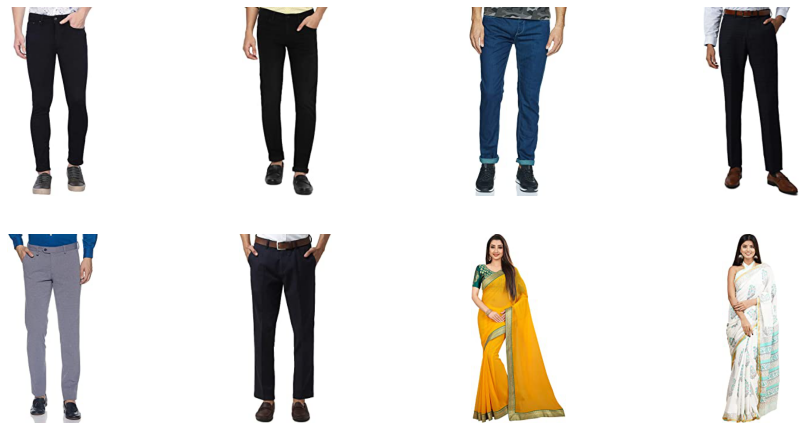

In [6]:
sample_images('/content/gdrive/MyDrive/data',images[::120])


In [7]:
# Let's now save to a new file

photos ,label = [],[]

def combine_all(folder):
  for file in listdir(folder):
	# determine class
    output = 0.0
    if file.startswith('j'):       # jeans
        output = 1.0
    elif file.startswith('s'):     # sarees
        output = 2.0 
    else: # file.startswith('t'):   #trousers
        output = 3.0
  	# load image

    photo = load_img(folder +'/'+ file ,target_size=(200,200))
    # convert to numpy array
    photo = img_to_array(photo)
    # storing
    photos.append(photo)
    label.append(output)

In [8]:
combine_all('/content/gdrive/MyDrive/data')

In [9]:
# convert to numpy array
photos = asarray(photos)
label = asarray(label)

print(photos.shape, label.shape)

(957, 200, 200, 3) (957,)


In [10]:
# save the reshaped photos
save("amazon_photos.npy",photos)
save('amazon_labels.npy',label)

In [11]:
# defining independent and target variables
x = photos
y = label

In [12]:
print(x.shape)
print(y.shape)

(957, 200, 200, 3)
(957,)


In [13]:
y.astype(int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [14]:
# checking the count of each category
number_list = np.array(y)

(unique, counts) = np.unique(number_list, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[  1. 320.]
 [  2. 307.]
 [  3. 330.]]


In [15]:
y = np_utils.to_categorical(y-1, 3)
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [16]:
y.shape

(957, 3)

In [17]:
# Rescaling the image
x = x/255

In [18]:
# splitting dataset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

In [19]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(717, 200, 200, 3) (717, 3)
(240, 200, 200, 3) (240, 3)


In [20]:
from keras.preprocessing.image import ImageDataGenerator

In [21]:
# Image data augmentation
img_augm = ImageDataGenerator(featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=False)

img_augm.fit(x_train)

In [22]:
from tensorflow.keras.models import Sequential

In [23]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 3 output neurons for 3 classes with the softmax activation
    tf.keras.layers.Dense(3, activation='softmax')
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [25]:
# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
# Fit the model
history = model.fit(x_train,y_train, epochs=12, validation_split=0.2, # taking 20 percent of training set for validation
                  callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience=3))

Epoch 1/12
18/18 [==============================] - 12s 124ms/step - loss: 1.0501 - accuracy: 0.4276 - val_loss: 0.8048 - val_accuracy: 0.6042
Epoch 2/12
18/18 [==============================] - 1s 58ms/step - loss: 0.6404 - accuracy: 0.6440 - val_loss: 0.5168 - val_accuracy: 0.7014
Epoch 3/12
18/18 [==============================] - 1s 58ms/step - loss: 0.4714 - accuracy: 0.7469 - val_loss: 0.4258 - val_accuracy: 0.8056
Epoch 4/12
18/18 [==============================] - 1s 58ms/step - loss: 0.4294 - accuracy: 0.7696 - val_loss: 0.3827 - val_accuracy: 0.8264
Epoch 5/12
18/18 [==============================] - 1s 58ms/step - loss: 0.3318 - accuracy: 0.8499 - val_loss: 0.2832 - val_accuracy: 0.8542
Epoch 6/12
18/18 [==============================] - 1s 60ms/step - loss: 0.3676 - accuracy: 0.8464 - val_loss: 0.4008 - val_accuracy: 0.8472
Epoch 7/12
18/18 [==============================] - 1s 57ms/step - loss: 0.2806 - accuracy: 0.9005 - val_loss: 0.3589 - val_accuracy: 0.8681
Epoch 8/12


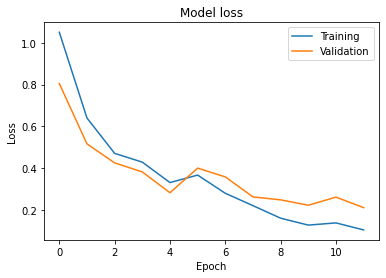

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

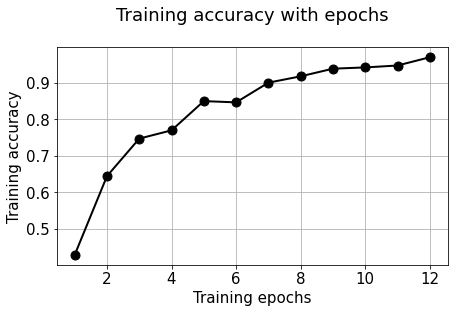

In [28]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(12)],history.history['accuracy'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

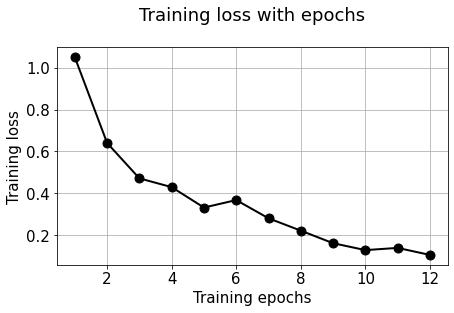

In [29]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(12)],history.history['loss'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training loss with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training loss",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [30]:
print("Accuracy : ", model.evaluate(x_test, y_test))

8/8 [==============================] - 0s 30ms/step - loss: 0.4028 - accuracy: 0.8625
Accuracy :  [0.40275493264198303, 0.862500011920929]


In [31]:
# Prediction on the test image
cnn_pred = model.predict(x_test, verbose=1)
cnn_pred = np.argmax(cnn_pred, axis=1) # this will pick the value in an array having the maximum score

8/8 [==============================] - 0s 28ms/step


In [32]:
cnn_pred[7]

0

In [33]:
y_test.shape

(240, 3)

In [36]:
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[2]

2

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


[Text(0, 0.5, 'jeans'), Text(0, 1.5, 'sarees'), Text(0, 2.5, 'trousers')]

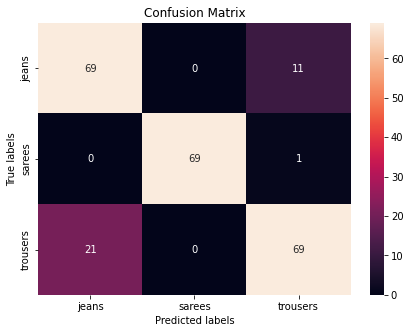

In [38]:
# Confusion matrix for results
cm = confusion_matrix(rounded_labels, cnn_pred)

fig, ax= plt.subplots(figsize=(7,5))
sns.heatmap(cm, annot=True, ax = ax, fmt='g') # annot=True to annotate cells. 'fmt' prevents the numbers from going to scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['jeans','sarees','trousers']) 
ax.yaxis.set_ticklabels(['jeans','sarees','trousers'])


In [39]:
test_labels=rounded_labels.tolist() # converting the test_labels into a list 

# Creating a function which picks random images and identifies the class to which the image belongs
def get_image_and_class(size):
  idx = np.random.randint(len(x_test), size=size) # generating a random image from the test data
  for i in range(len(idx)):
    plt.imshow(x_test[idx,:][i]) 
    plt.show()
    
  # Print the class of the random image picked above
    if test_labels[idx[i]] == 1:
      print('This is a sarees!')
    elif test_labels[idx[i]] == 0:
      print('This is a jeans!')
    elif test_labels[idx[i]] == 2:
      print('This is a trousers!')

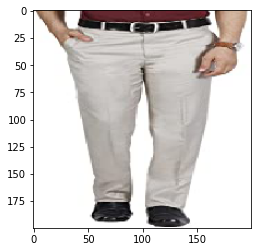

This is a trousers!


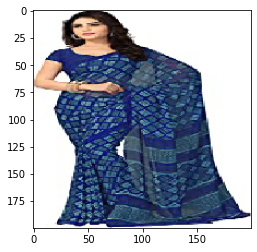

This is a sarees!


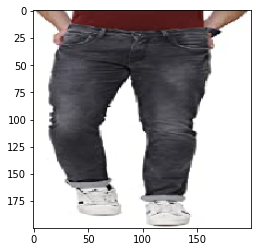

This is a jeans!


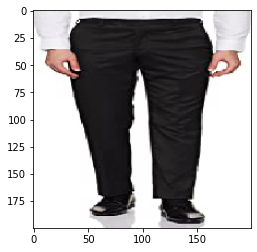

This is a trousers!


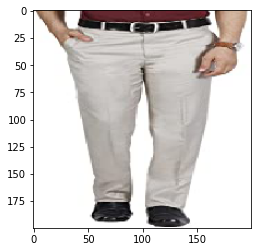

This is a trousers!


In [40]:
get_image_and_class(5)